# Linear Regression - Jun Lee

To get the line equation, you calculate mean square error of the points to optimize the line so it has the least errors.
Finding the "line of best fit" from a bunch of points so we can predict new data

Linear Regression is a method used in statistics to find the relationship between one, or in this case multiple independent varibles against a dependent varible. In this assignment, we are predicting the dependent varible which will be ISI (Initial Spread Index) of a forest fire. The goal is for the trend to be linear and for us to be able to draw a "line of best fit" for the data, helping us to predict future data points

Equation of a Line: In linear regression, the relationship between the dependent variable (y) and independent variable(s) (x) is modeled by a linear equation:

### **f(𝑥) = 𝑦 = 𝑚𝑥+𝑏**

Where: <br>
**m** is the slope or gradient of the line \frac{rise}{run} <br>
**b** is the y-intercept, where the line crosses the y-axis. <br>

Objective: The goal is to find the values of m (coefficients) and b (intercept) that minimize the error between the predicted values and the actual data points. This is done by minimizing the Mean Squared Error (MSE), which measures the average squared difference between the predicted values and the actual values.

In [2]:
# Library Imports
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as pyplot
import pickle
from sklearn import linear_model
from sklearn.utils import shuffle
from matplotlib import style

**Taking in our Dataset** <br>
Here we are taking in our dataset we will use for this linear regression program, which is "forestfires.csv". <br>
We have defined our varible "data" and parsed the csv into it and then printed out the first couple of vales to ensure everything is running smoothly

In [3]:
#Using Pandas atrributes
data = pd.read_csv("forestfires.csv", sep=",")
print(data.head())

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


In [4]:
data = data[["FFMC", "ISI", "temp", "wind", "area"]]
print(data.head())

   FFMC  ISI  temp  wind  area
0  86.2  5.1   8.2   6.7   0.0
1  90.6  6.7  18.0   0.9   0.0
2  90.6  6.7  14.6   1.3   0.0
3  91.7  9.0   8.3   4.0   0.0
4  89.3  9.6  11.4   1.8   0.0


In [6]:
predict = "ISI"

#Set X and Y
x = np.array(data.drop(predict, axis=1))
y = np.array(data[predict])

In [7]:
# Split the data set into train and test sets
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

In [8]:
 linear = linear_model.LinearRegression()

# # Define the line of best fit
 linear.fit(x_train, y_train)
 acc = linear.score(x_test, y_test)
 print(acc)

0.4750201973613134


In [19]:
with open("firemodel.pickle", "wb") as f:
    pickle.dump(linear, f)

In [20]:
# Load the pickle file
pickle_in = open("firemodel.pickle", "rb")
linear = pickle.load(pickle_in)

In [11]:
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)

Coefficient: 
 [ 0.33358719  0.21033111  0.46575897 -0.00248673]
Intercept: 
 -27.013933058555715


In [12]:
predictions = linear.predict(x_test)

for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x]) 

11.75265903157537 [93.4 30.2  2.7  0. ] 8.1
3.962797141537603 [84.7   2.2   4.9   9.27] 4.1
8.496932821756467 [91.4 15.9  3.6  0. ] 5.2
2.9321827053589615 [82.1  5.3  3.1  0. ] 2.9
10.246119206598351 [93.  18.8  4.9  0. ] 7.7
9.878489933174343 [90.2 19.5  5.8  0. ] 6.2
10.288996927539714 [92.3 24.1  3.1  0. ] 8.5
7.207824319944081 [90.7  12.9   2.7   2.18] 6.8
10.724159818465473 [92.6 20.6  5.4  0. ] 8.8
7.298903730567957 [84.6   8.2   9.4   4.62] 3.3
8.152475610372875 [88.8 14.4  5.4  0. ] 9.0
9.43985058922469 [ 93.7   21.9    2.2  174.63] 8.4
4.084070805721755 [79.5 11.8  4.5  0. ] 1.1
9.648516014315085 [95.1 20.6  1.3  0. ] 17.7
11.838905893742982 [95.5  23.3   4.5   0.55] 13.2
2.1784426420490703 [69.  17.4  5.4  0. ] 0.7
11.337086206819322 [93.1 28.7  2.7  0. ] 13.5
8.21331247931559 [90.6  15.1   4.   13.99] 7.8
7.758634229663976 [81.6  21.2   6.7  11.16] 1.9
7.915687346875892 [90.5  11.8   4.9   9.71] 16.3
9.570253041646396 [92.1 21.   3.1  0. ] 14.3
13.854362871843968 [95.8 32.4 

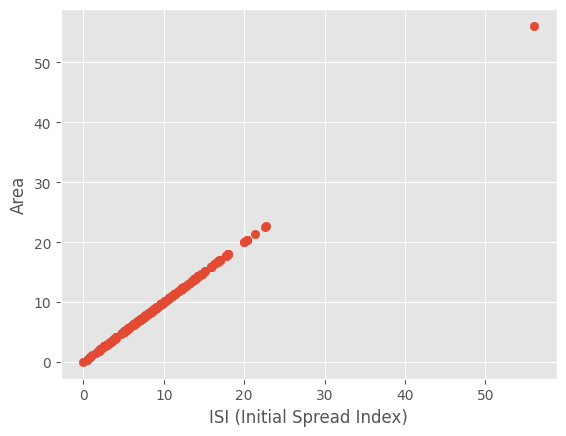

In [21]:
style.use("ggplot")

# Set up a scatter plot
p = "ISI"
pyplot.scatter(data[p], data["ISI"])
pyplot.xlabel("ISI (Initial Spread Index)")
pyplot.ylabel("Area")
pyplot.show()